#Før du starter

Før vi starter dette projekt, skal tidligere skabte mapper og filer slettes!

Derfor starter denne sektion, med disse koder.

først renames mapperne og filerne, så de ikke indeholder mellemrum. Det er primært mapper "cornell movie_dialogs corpus". Derefter skal vi fjerne mapperne "datasets", "__MAXOSX"! & "data", samt mappen "BERT-test-1" der indeholder vores trænede model.

In [ ]:
!rm -rf cornell_movie-dialogs_corpus

In [ ]:
!rm -rf datasets

In [ ]:
!rm -rf __MACOSX

In [ ]:
!rm -rf data

In [ ]:
!rm -rf bert-test-1

# Intro til: **BERT language-model** - fra bunden med Python

#### **Hvad er BERT?**
BERT, som står for "Bidirectional Encoder Representations from Transformers", er baseret på transformers, en deep learning-model, hvor hvert output-element er forbundet til hvert input-element og vægtningen mellem dem, beregnes dynamisk baseret på deres forbindelse.

Historisk set kunne sprogmodeller kun læse inputtekst sekventielt - enten venstre mod højre eller højre mod venstre - men kunne ikke gøre begge dele på samme tid. BERT er anderledes, fordi det er designet til at læse i begge retninger på én gang. Introduktionen af transformermodeller muliggjorde denne evne, som er kendt som tovejs. Ved at bruge todirektionalitet er BERT fortrænet i to forskellige, men relaterede NLP-opgaver: Masked Language Modeling (MLM) og næste sætningsforudsigelse (NSP).

Derudover er BERT-modellen open source og ikke black-box, så du kan lave yderligere analyse for at forstå hvad der foregår inde i de neurale netværk bedre. GPT-modellerne fra OpenAI er black-box og lukket.

[(Src Link - Arxiv.org - Research papers)](https://arxiv.org/pdf/1810.04805)

[(Src Link - Github.com - Code documentation)](https://github.com/google-research/bert)

[(Src Link - Github.com - Code inspiration)](https://github.com/Currie32/Chatbot-from-Movie-Dialogue/blob/master/Chatbot_Attention.ipynb)


At skabe en BERT-model fra bunden er en indviklet opgave, der kræver omfattende ressourcer og digital-compute power. Der er dog en mere praktisk tilgang: finjustering af en præ-trænet model til specifikke downstream-opgaver. Men kræver din situation at du starter fra bunden med at træne en transformer, og opbygge dit eget Vocab - så læs videre herunder.

Selvom det kan virke overvældende at dykke ned i de indviklede detaljer ved kodning af BERT, giver det uvurderlig indsigt i modellens virkemåde. Denne guide fører dig gennem processen og giver en omfattende forståelse af BERT. Uanset om du er en erfaren erfaren eller nybegynder, lover jeg en givende læringsoplevelse ved at udforske alle skridt i, at bygge en BERT-model fra bunden. Dyk ned i den fulde notesbog i herunder for at begive dig ud på rejsen.

# 1. **Dowload Datasets**

## Transformers
Først skal vi installere Transformers [(Src Link)](https://huggingface.co/docs/transformers/installation). Arbejder du i en kildekode-editor er det vigtigt at starte med at lave et virtuelt environment (som beskrevet i Linket).

## Datasets
Derefter installere vi Datasets [(Src Link)](https://huggingface.co/docs/datasets/index). Datasets er et bibliotek der gør det nemt at tilgå og dele datasets, til sine modeller indenfor Audio, Computer Vision, og Natural Language Processing (NLP) opgaver.

## Tokenizers
Sidst men ikke mindst skal vi bruge biblioiteket Tokenizers, til at byge vores Tokenizer algoritme fra ny![Screen-Shot-2021-08-07-at-7.51.37-AM.png](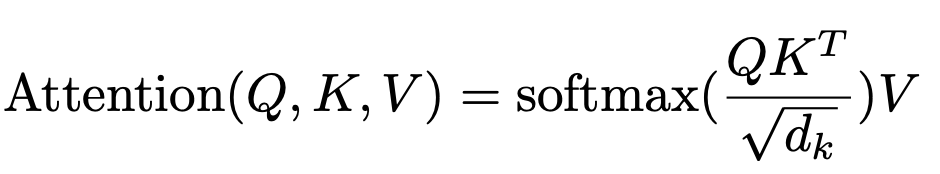![Screen-Shot.jpeg](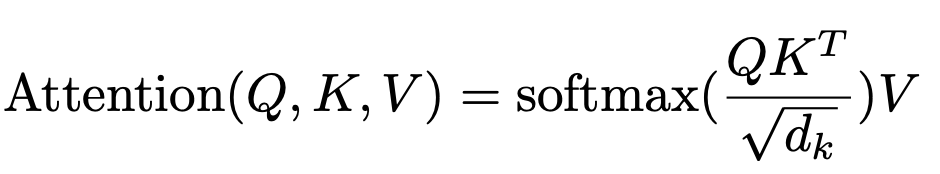![image3.jpeg](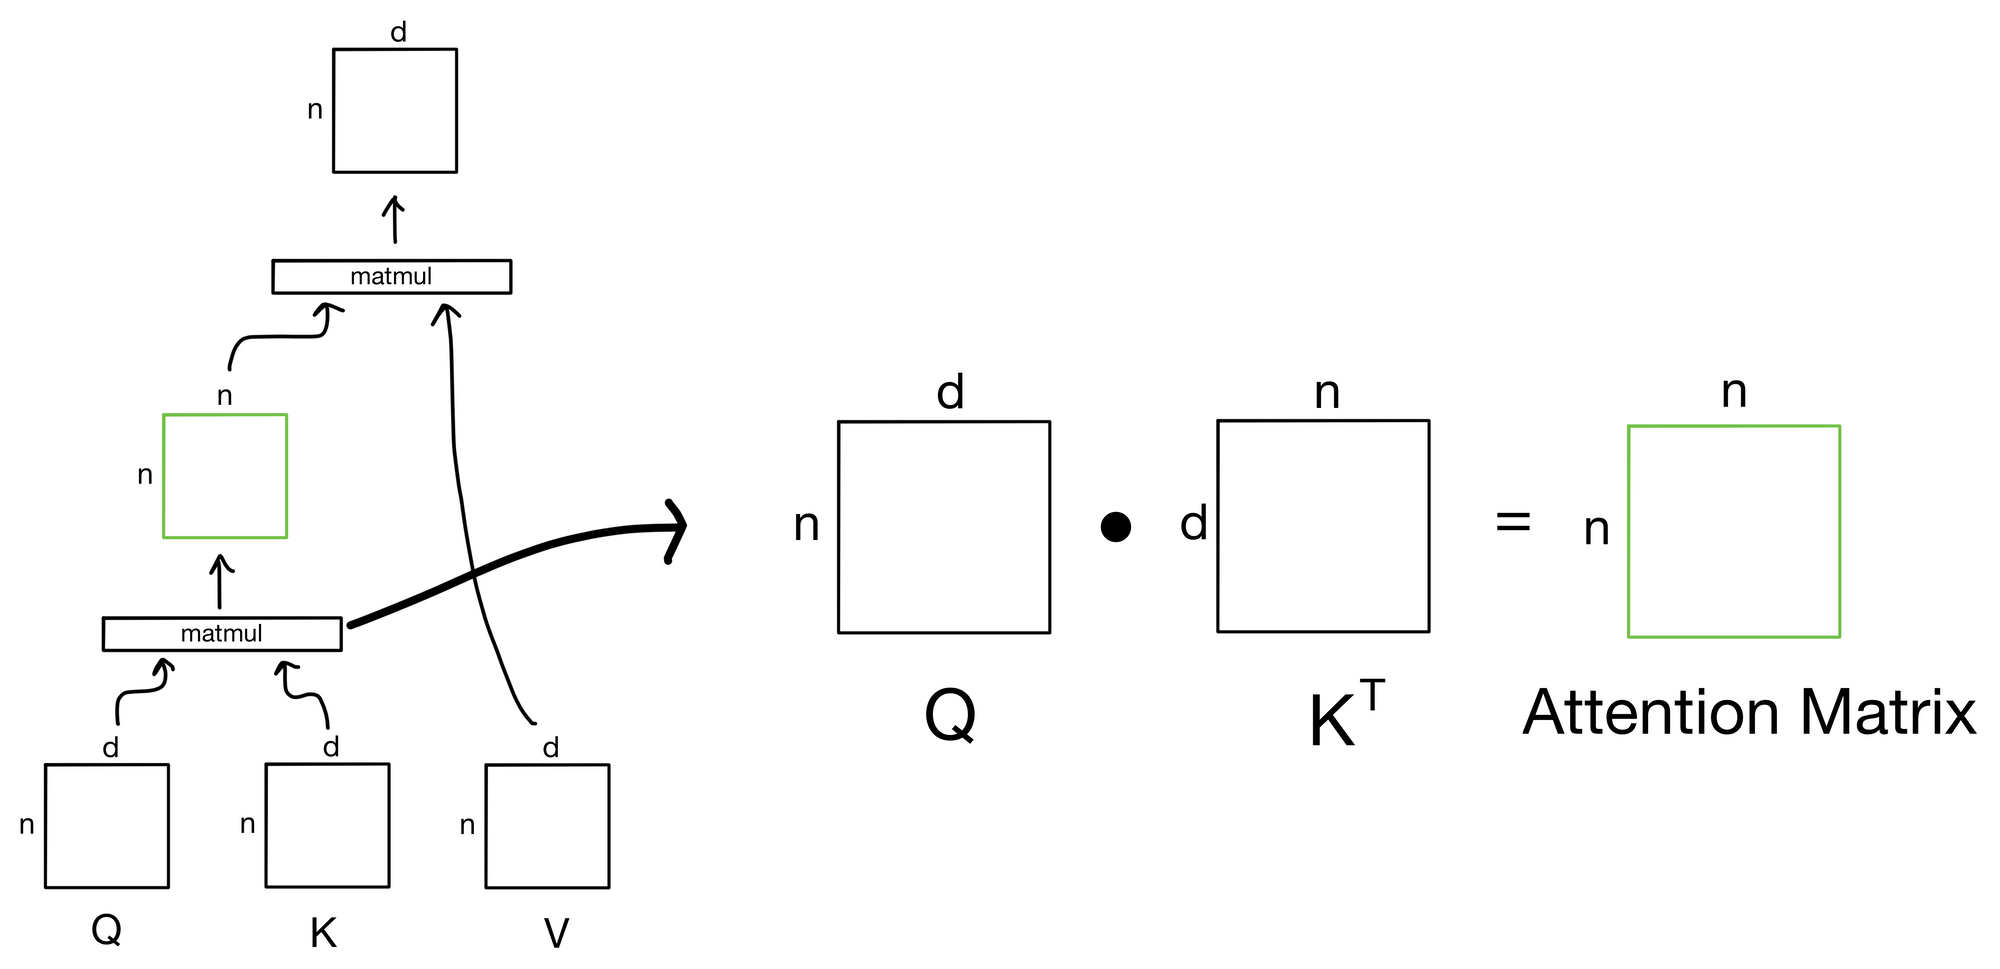![BERT_arkitektur.jpeg](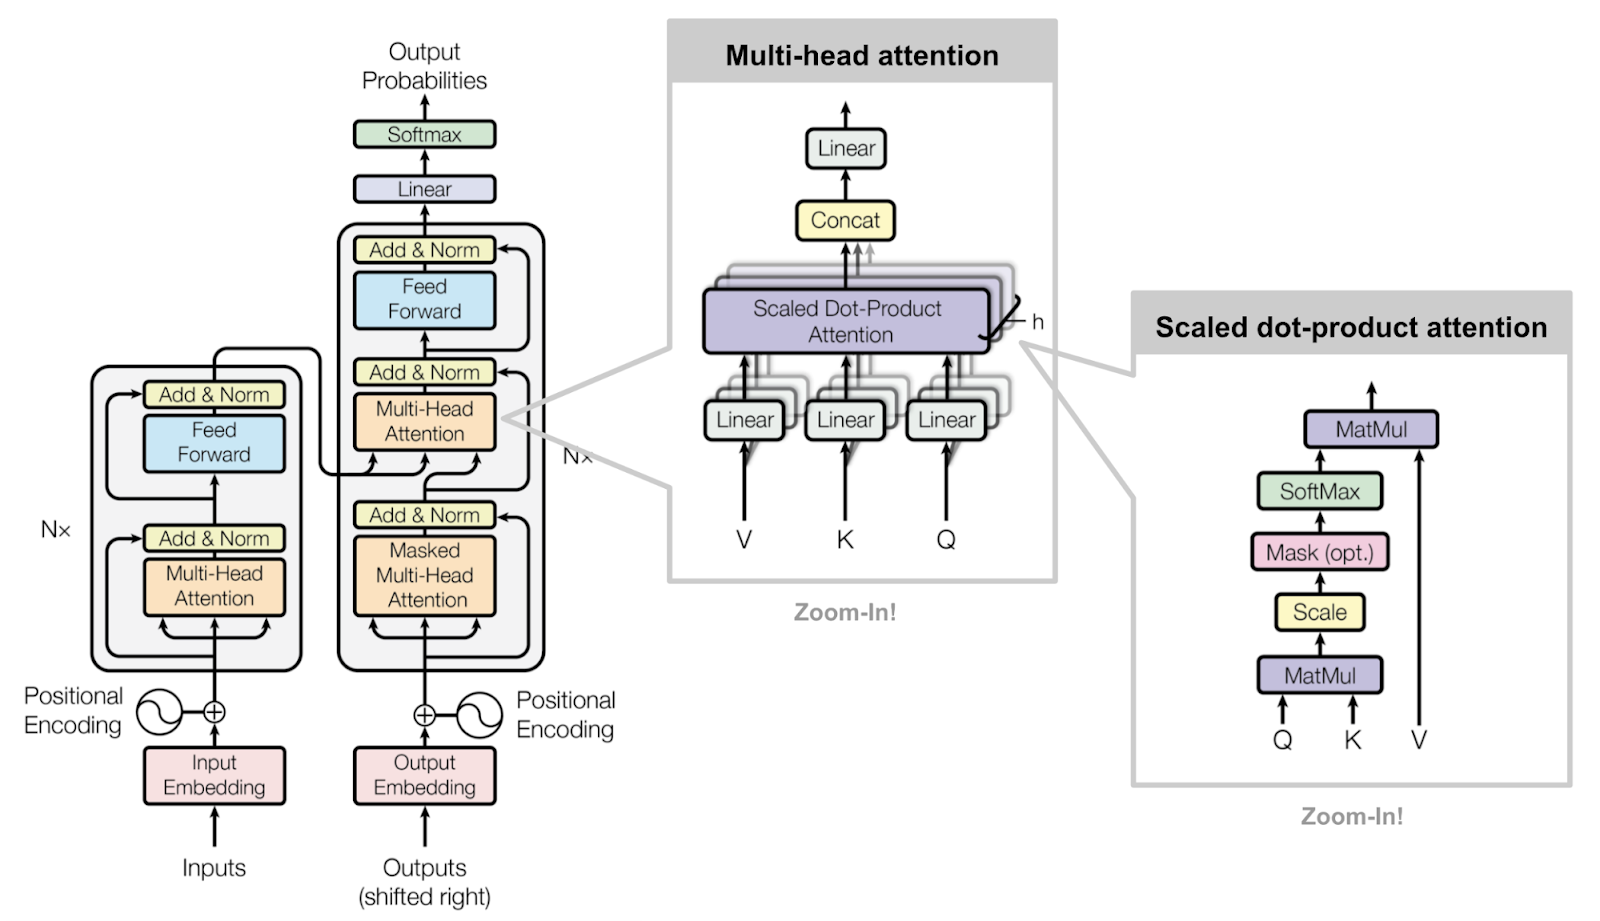![Screen-Shot.jpeg](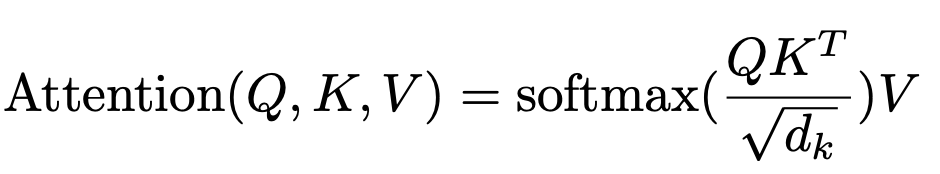![Screen_shot.jpeg](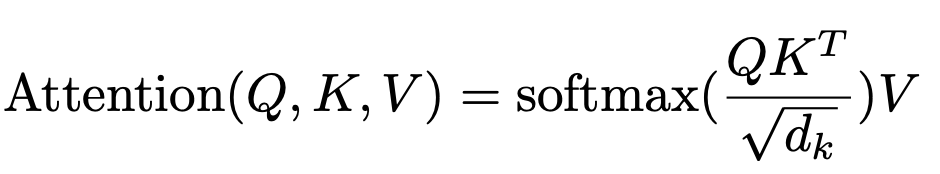![BERT_arkitektur.jpeg](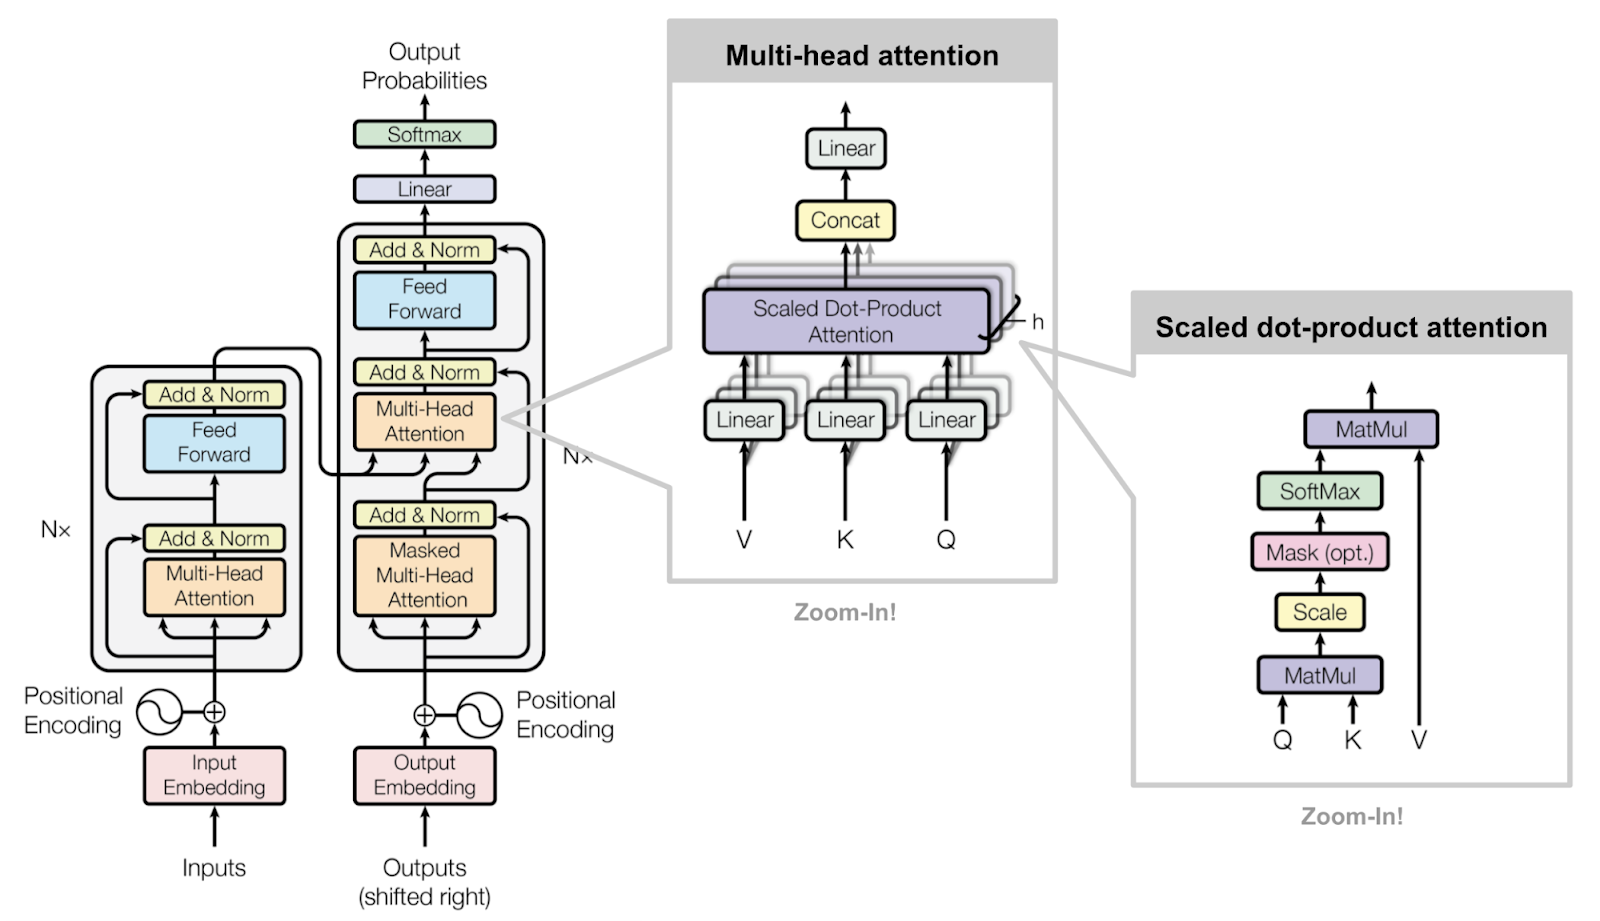![Screen_shot.jpeg](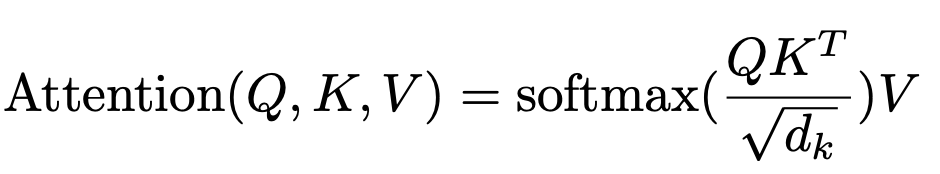![screendump.png](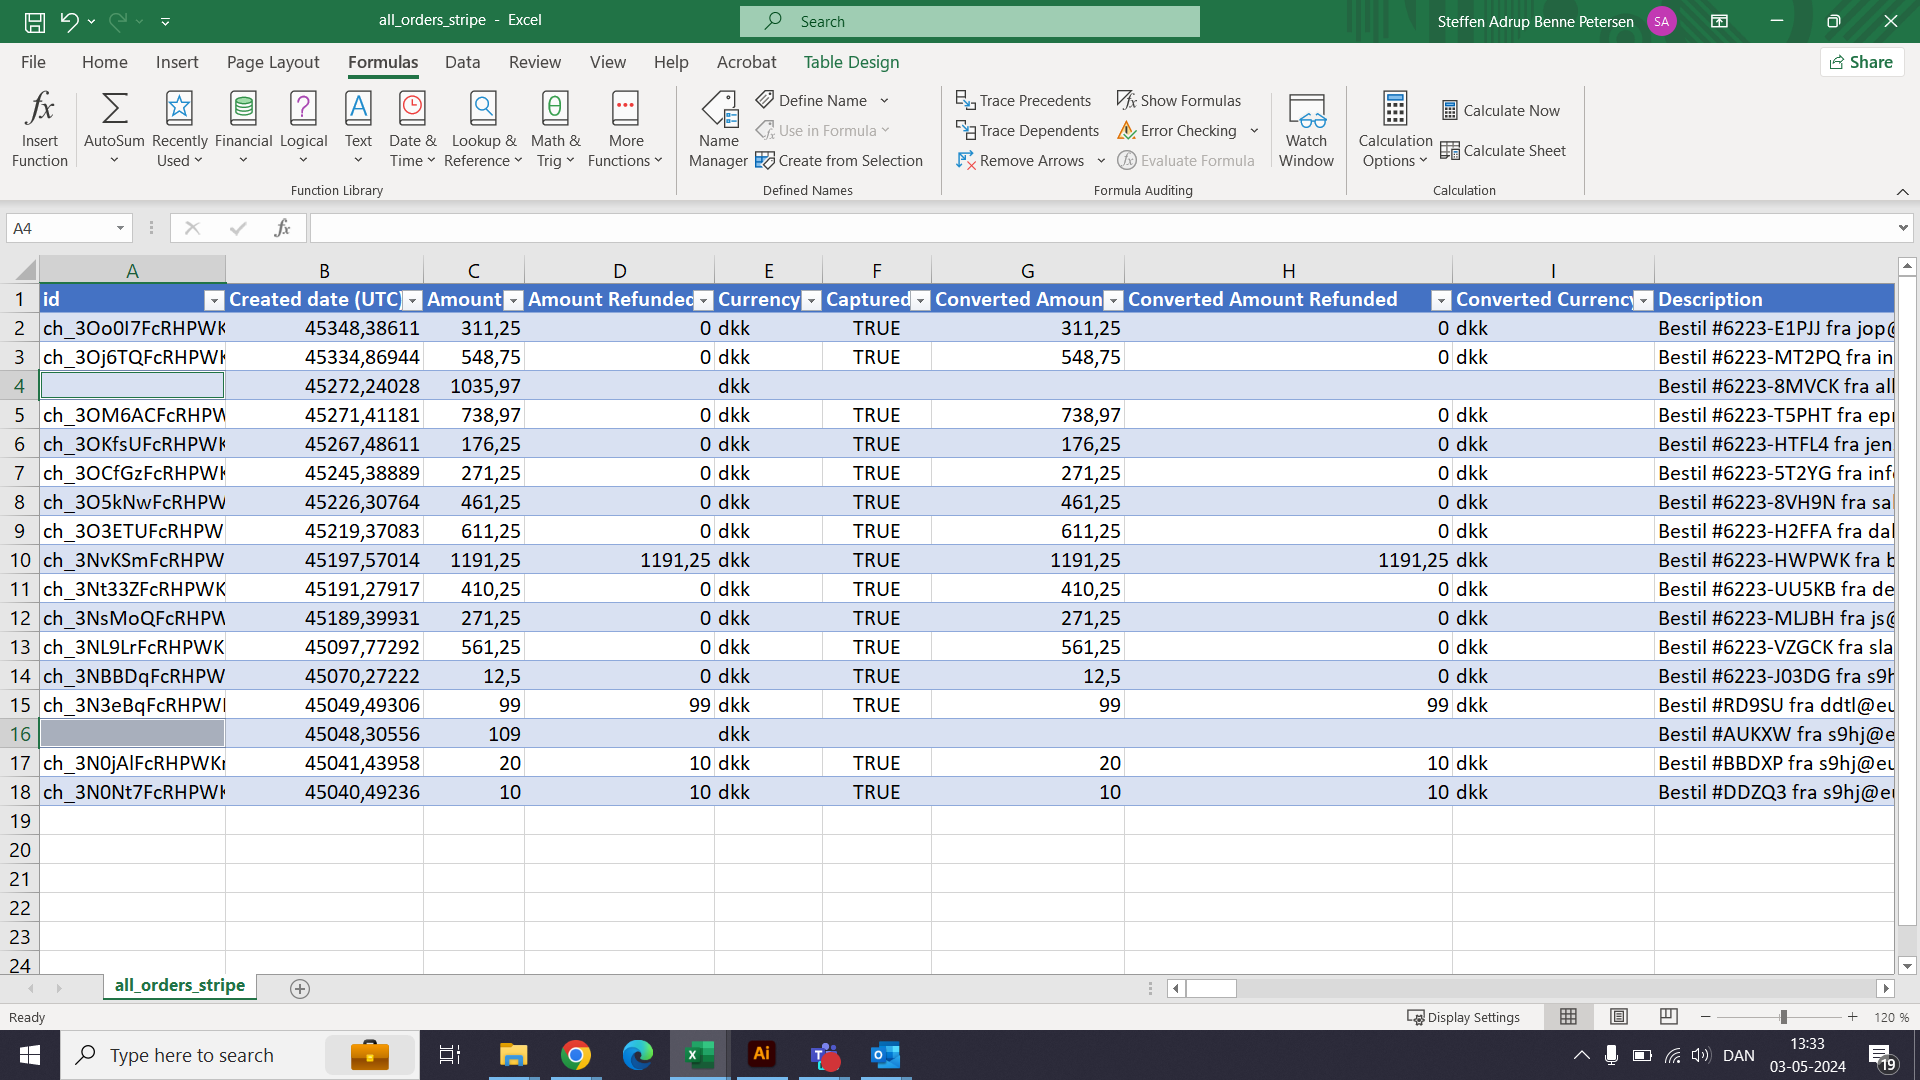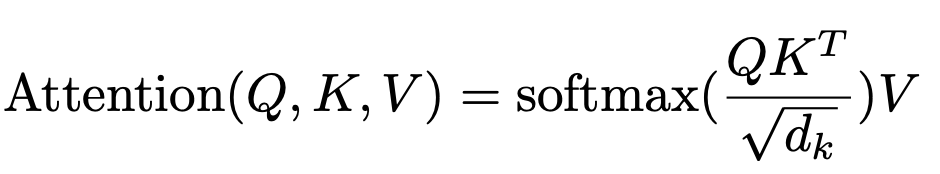))))))))) [(Src Link)](https://huggingface.co/docs/transformers/main_classes/tokenizer). En tokenizer er ansvarlig for at forberede input til en model. Biblioteket indeholder tokenizere til alle modellerne - i dette tilfælde vil vi benytte BERT's Tokenizer og træne den fra ny.




In [ ]:
!pip install tokenizers datasets transformers

## download datasets fra Cornell University
Til vores tutorial her, bruger vi et hyppigt brugt dataset. Vi bruger Cornell Movie-Dialogs Corpus [(Src Link)](https://www.kaggle.com/datasets/rajathmc/cornell-moviedialog-corpus), en enorm samling af over 220.000 engelske samtaleudvekslinger mellem mere end 10.000 par karakterer i forskellige film og tv-shows.

### 1.

Først  opretter vi en ny mappe i roden kaldet Datasets


```
!mkdir datasets
```


### 2.

Derefter bruger vi "!Wget" til at hente datasetttet ned fra Cornell University's hjemmeside.


```
!wget http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip`
```


### 3.

Derefter unzipper vi datasettet, som i dette tilfælde indeholder 2 .txt filer. Movie_conversations.txt + movie_lines.txt


```
!unzip -qq cornell_movie_dialogs_corpus.zip
```


### 4.
Derefter flytter vi de unzippede .txt filer hen i datasets mappen i roden.


```
!mv cornell\ movie-dialogs\ corpus/movie_conversations.txt ./datasets
!mv cornell\ movie-dialogs\ corpus/movie_lines.txt ./datasets
```


### 5.
Til sidst sletter vi den zippede fil igen.


```
!rm cornell_movie_dialogs_corpus.zip
```



In [ ]:
!mkdir datasets
!wget http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip
!unzip -qq cornell_movie_dialogs_corpus.zip
!mv cornell\ movie-dialogs\ corpus/movie_lines.txt ./datasets
!mv cornell\ movie-dialogs\ corpus/movie_conversations.txt ./datasets
!rm cornell_movie_dialogs_corpus.zip

--2024-05-05 13:50:16--  http://www.cs.cornell.edu/~cristian/data/cornell_movie_dialogs_corpus.zip
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9916637 (9.5M) [application/zip]
Saving to: ‘cornell_movie_dialogs_corpus.zip’

cornell_movie_dialo 100%[===================>]   9.46M  10.6MB/s    in 0.9s    

2024-05-05 13:50:18 (10.6 MB/s) - ‘cornell_movie_dialogs_corpus.zip’ saved [9916637/9916637]



### Tjek dine datasets

For at kunne se de datasets vi har importeret, bruger vi Pandas biblioteket.

**Pandas** er et kraftfuldt, fleksibelt open source bibliotek i Python, designet til data manipulation og -analyse, specielt til strukturerede data som tabeller og tidsserier. Værktøjets nylige integration med AI-funktioner gør det nu muligt at udføre komplekse analyser med støtte fra machine learning.

Vi laver først 2 dataframes i hukommelsen.

1. .**lines** og henter "movie_lines.txt" filen ind i dette dataframe kaldet "lines".

2. .**conv_lines** og henter "movie_conversations.txt" filen ind i dette dataframe kaldet "conv_lines".

3. .**open**('datasets/movie_lines.txt', encoding='utf-8', errors='ignore'): Dette åbner filen med navnet 'movie_lines.txt', som findes i 'datasets'-mappen. Den specificerer kodningen som UTF-8 (encoding='utf-8'). UTF-8 er en tegnkodning, der kan repræsentere et hvilket som helst tegn i Unicode-standarden.

4. .**errors**='ignore' fortæller Python at ignorere eventuelle kodningsfejl, der opstår under læsning af filen. Dette er nyttigt, når du håndterer filer, der kan indeholde tegn, der ikke er kompatible med den angivne kodning.

5. .**read**(): Dette læser indholdet af filen ind i hukommelsen som en enkelt streng.

6. Opdeling af indholdet: .split('\n'): Dette opdeler strengen i en liste af strenge ved at bruge nylinjetegnet ('\n') som skilletegn. Dette opdeler effektivt filens indhold i linjer, hvor hver linje bliver et element i listen.



In [ ]:
import pandas as pd

# Load dataen i dataframes
lines = open('datasets/movie_lines.txt', encoding='utf-8', errors='ignore').read().split('\n')
conv_lines = open('datasets/movie_conversations.txt', encoding='utf-8', errors='ignore').read().split('\n')

# Vis en liste over de 10 første linjer i movie_lines.txt
lines[:10]


['L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!',
 'L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!',
 'L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.',
 'L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?',
 "L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.",
 'L924 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ Wow',
 "L872 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Okay -- you're gonna need to learn how to lie.",
 'L871 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ No',
 'L870 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I\'m kidding.  You know how sometimes you just become this "persona"?  And you don\'t know how to quit?',
 'L869 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Like my fear of wearing pastels?']

In [ ]:
# Vis en liste over de 10 første linjer i movie_conversations.txt
conv_lines[:10]

["u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L271', 'L272', 'L273', 'L274', 'L275']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L276', 'L277']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L280', 'L281']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L363', 'L364']",
 "u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L365', 'L366']"]

# 2. **Forbered Dataset** - til simpel spørgsmål-svar AI

## Installer de nødvendige biblioteker

For at komme i gang med at bygge BERT-modellen fra bunden, starter vi med at importere de nødvendige biblioteker og forberede datasættet ved at gemme det i hukommelsen.

Vi bruger Pytorch som vores primære bibliotek til at udvikle vores BERT model.


> ***PyTorch*** *er et maskinlæringsbibliotek baseret på Torch-biblioteket, der bruges til applikationer som computersyn og naturlig sprogbehandling, oprindeligt udviklet af Meta AI og nu en del af Linux Foundation-umbrella. [(Src Link)](https://pytorch.org/)*








In [ ]:
import os
import re
import tqdm
import itertools
import numpy as np
import math
from pathlib import Path
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam
import random
import transformers, datasets
from transformers import BertTokenizer
from tokenizers import BertWordPieceTokenizer

## Data Prepocessing


1. Datakorpuset er opdelt i to filer, 'movie_conversations.txt' og 'movie_lines.txt' og placeret i mappen datasets. Vi forbehandler datasættet ved at indlæse det i dateframes i hukommelsen.



```
corpus_movie_conv = './datasets/movie_conversations.txt'
corpus_movie_lines = './datasets/movie_lines.txt'
```

Derefter bruger vi open. funktionen til at åbne .txt filen i dataframet:


```
with open(corpus_movie_conv, 'r', encoding='iso-8859-1') as c:
    conv = c.readlines()
with open(corpus_movie_lines, 'r', encoding='iso-8859-1') as l:
    lines = l.readlines()
```


2. Vi opdeler derefter teksten i 'movie_lines.txt' ved hjælp af et særligt skilletegn ('+++ $ +++') for at adskille linjens ID, karakter-id, film-id og dialogtekst og gemme dem i en ordbog kaldet line_dic:


```
lines_dic = {}
for line in lines:
    objects = line.split(" +++$+++ ")
    lines_dic[objects[0]] = objects[-1]
```


3. Dernæst genererer vi spørgsmål-svar-par ved at iterere over hver samtale i 'movie_conversations.txt' og parre den aktuelle linjes tekst med den næste linjes tekst for hver samtale. Ved at definere en "first" og en "second" sætning på ID'et og ID +1.



4. Endelig begrænser vi den maksimale længde af inputsekvensen til 64 ord, Det gør vi ved at definere MAX_LEN = 64. De Sætninger der er over 64 ord bliver udeladt (Dette giver en Error som vi ignorerer og printer ID'et på i terminalen.


```
        else:
            print(f"En eller begge nøgler ({ids[i]}, {ids[i+1]}) blev ikke fundet i dictionary. Ignorer bare denne fejl")
```


In [ ]:
### Vi sætter Max input længden til at være 64
MAX_LEN = 64

### uploader datasets i hukommelsen
corpus_movie_conv = './datasets/movie_conversations.txt'
corpus_movie_lines = './datasets/movie_lines.txt'
with open(corpus_movie_conv, 'r', encoding='iso-8859-1') as c:
    conv = c.readlines()
with open(corpus_movie_lines, 'r', encoding='iso-8859-1') as l:
    lines = l.readlines()

### splitter teksten ved hjælp af et særligt skilletegn ('+++ $ +++')
lines_dic = {}
for line in lines:
    objects = line.split(" +++$+++ ")
    lines_dic[objects[0]] = objects[-1]

### generere spørgsmål- og svar par
pairs = []
for con in conv:
    ids = eval(con.split(" +++$+++ ")[-1])
    for i in range(len(ids)):
        qa_pairs = []

        if i == len(ids) - 1:
            break

        if ids[i] in lines_dic and ids[i+1] in lines_dic:  # Tjek om nøglerne eksisterer i dictionary
            first = lines_dic[ids[i]].strip()
            second = lines_dic[ids[i+1]].strip()

            qa_pairs.append(' '.join(first.split()[:MAX_LEN]))
            qa_pairs.append(' '.join(second.split()[:MAX_LEN]))
            pairs.append(qa_pairs)
        else:
            print(f"En eller begge nøgler ({ids[i]}, {ids[i+1]}) blev ikke fundet i dictionary. Ignorer bare denne fejl")


### Eksempel på et Spørgsmål- og svar på

Lad os prøve at printe et tilfædigt spørgsmål- svar par med nednestående kode og value.

In [ ]:
print(pairs[3020])

['Yes.', 'That\'s all you got to say? "Yes".']


# **Hvad er Tokenization**

### **Hvad er en Tokenization algoritme**

###Tokenization

Det første skridt, når man skal skabe en frisk BERT-model, involverer træningen af en ny tokenizer algoritme [(Src Link)](https://huggingface.co/docs/transformers/main_classes/tokenizer). tokenization er processen hvor vi nedbryder en tekst i mindre enheder kaldet "tokens", som derefter konverteres til en numerisk repræsentation.

###WordPiece_tokenizer
Her anvender vores BERT-model en WordPiece-tokenizer [(Src Link - Closed-source WordPiece)](https://huggingface.co/learn/nlp-course/chapter6/6?fw=pt), som kan opdele et enkelt ord i flere tokens. Denne teknik hjælper modellen med at forstå, at ord som surfboard og snowboard har delt betydning gennem det fælles ordstykke ##board.
Et eksempel på dette ville være at opdele den engelske sætning:

> **I like surfboarding!**

som efter at være igennem en BERT Wordpierce Tokenizer, vil ende i stil med →

> **[‘[CLS]’, ‘i’, ‘like’, ‘surf’, ‘##board’, ‘##ing’, ‘!’, ‘[SEP]’]**

og igenne repræsenteret som numeriske værdier →

> **[1, 48, 250, 4033, 3588, 154, 5, 2]**

### Alternativ BPE Tokenization
Alternativt kan SentencePiece bruges. SentencePiece er en Open-Source Tokenizer. [Src Link - SentencePiece](https://github.com/google/sentencepiece)


###Specielle Tokens
Et tokeniseret BERT-input starter altid med et særligt [CLS]-token og slutter med et særligt [SEP]-token, som bruges til specifikke formål, som vil blive forklaret senere.



# 3. **Træn en Tokenizer algoritme**

For at træne vores tokenizeren anvender vi BERT WordPiece Tokenizer fra transformer-biblioteket med nedenstående trin:

1. **Gem samtaleteksten** fra vores redigerede datasets i flere .txt-filer (i batch af N=10.000).

2. **Definer BERT WordPiece Tokenizer** med nogle parametre som **clean_text** (kan prædefineres til at passe til andre sprog, bruges dog ikke i dette eksempel) [(Src Link)](https://github.com/Currie32/Chatbot-from-Movie-Dialogue/blob/master/Chatbot_Attention.ipynb) for at fjerne kontroltegn, handle_chinese_chars for at inkludere mellemrum omkring kinesiske tegn, stripe_accenter for at fjerne accenter og gøre é → e, ô → o, og ændre små bogstaver for at se store og små bogstaver som lige store værdier. (kan undlades, for at vægte Storebogstaver forskelligt. Kræver dog et større library og dermed mere compute-power)

3. **Træn tokenizeren** baseret på filstien til .txt-filer med parametre som vocab_size definerer det samlede antal tokens, min_frequency for minimumsfrekvens for et par tokens, der skal flettes, special_tokens definerer en liste over de specielle tokens, som BERT bruger, limit_alphabet for et maksimalt antal forskellige tegn, workpieces_prefix præfikset tilføjet til stykker af ord (som ##ing).

# 4. **Opbyg et Vocabulary**


At opbygge et vokabular (vocab) i BERT er afgørende, fordi BERT og lignende modeller arbejder med tekstdata, og de har brug for at kende det sæt af ord eller subord, som de skal arbejde med.

**Når vi opbygger et vokabular** i BERT, gennemgår vi typisk den tekstmængde, som modellen skal trænes på (datasets i files=paths), og vi udvælger de unikke ord eller subord (tokens) fra denne tekst. Dette resulterer i en liste over tokens, der udgør vokabularet på en prædefineret størrelse (vocab_size=30_000), set fra et statistisk perspektiv (min_frequency=5), ud fra forekomsten af disse tokens i de dataset modellen trænes på i files=paths.

**Dette vokabular** bruges derefter under træning og prædiktion. Under træningen bruger BERT vokabularet til at mappe ord til unikke numeriske identifikatorer (token IDs), som modellen kan arbejde med. Under prædiktionen bruges vokabularet til at konvertere inputteksten til en sekvens af token IDs, som modellen kan forstå og bearbejde.

**Det er også vigtigt at overveje**, hvor stort vokabularet skal være. Et større vokabular kan dække flere ord, men det kan også gøre træning og prædiktion langsommere og kræve mere hukommelse. Derfor er der ofte en afvejning mellem vokabularets størrelse og modellens præstation.

**Wordpiece_prefix** definerer hvilke/t tegn der bruges til at splitte ord, som i eksemplet ovenfor med "I like surfboarding!", hvor "boarding" kan have delte semantiske positioner, som i surfbarding, snowboarding og skateboarding.

Open Source

In [ ]:
# Vores BERT WordPiece tokenizer

### Gem data som .txt filer
os.mkdir('./data')
text_data = []
file_count = 0

for sample in tqdm.tqdm([x[0] for x in pairs]):
    text_data.append(sample)

    # Når vi rammer et batch-nummer på 10K, gemmer vi en ny fil med tæller
    if len(text_data) == 10000:
        with open(f'./data/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(text_data))
        text_data = []
        file_count += 1

paths = [str(x) for x in Path('./data').glob('**/*.txt')]

### træning af vores egen tokenizer baseret på vores Vocabulary
tokenizer = BertWordPieceTokenizer(
    clean_text=True,
    handle_chinese_chars=False,
    strip_accents=False,
    lowercase=True
)

tokenizer.train(
    files=paths,
    vocab_size=30_000,
    min_frequency=5,
    limit_alphabet=1000,
    wordpieces_prefix='##',
    special_tokens=['[PAD]', '[CLS]', '[SEP]', '[MASK]', '[UNK]']
    )

os.mkdir('./bert-test-1')
tokenizer.save_model('./bert-test-1', 'bert-test-1')
### tokenizer = BertTokenizer.from_pretrained('./bert-test-1/bert-test-vocab.txt', local_files_only=True) (denne kode bruges ikke længere. Nedenfor er den opdaterede)
tokenizer = BertTokenizer.from_pretrained('./bert-test-1/bert-test-1-vocab.txt', local_files_only=True)


100%|██████████| 221616/221616 [00:00<00:00, 1272371.83it/s]
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1988: FutureWarning: Calling BertTokenizer.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


## Se vores nyskabte BERT Vocabulary

Se et udsnit af vores nyligt skabte BERT-1 Vocabulary, der indeholder alle vores Tokens, der har en frekvens på mere end 5 i vores konfigurerede datasets.

In [ ]:
# Load dataen i dataframes
vocab = open('./bert-test-1/bert-test-1-vocab.txt', encoding='utf-8', errors='ignore').read().split('\n')

# Vis en liste over de 25 første linjer i vores vocab
vocab[:25]

['[PAD]',
 '[CLS]',
 '[SEP]',
 '[MASK]',
 '[UNK]',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5']

In [ ]:
# Vis en liste over de sidste 25 linjer i vores vocab
vocab[-25:]

['schoolyard',
 'insurrection',
 'diabetes',
 'compiegne',
 'jezebel',
 'indeterminate',
 'delaware',
 'incarceration',
 'calrissian',
 'esparza',
 'submarine',
 'gregoire',
 'distasteful',
 'entreprene',
 'misguided',
 'sidetracked',
 'catacombs',
 'hygiene',
 'southglen',
 'philharmonic',
 'gasparilla',
 'extracurricular',
 'mcconnell',
 'siegfried',
 '']

### Vigtigste parametre i vores trænings-script

Dette script træner en WordPiece-tokenizer ved hjælp af et givet sæt af tekstfiler.

Her er en forklaring på de vigtigste parametre i træningscriptet gør og hvad de ændre:

1. `files=paths`: Dette parameter specificerer de filer, der skal bruges til at træne tokenizeren. `paths` er en liste over filstier. Vi definerede paths tidligere i:
`paths = [str(x) for x in Path('./data').glob('**/*.txt')]`

2. `vocab_size=30_000`: I dette parameter definerer vi størrelsen på det resulterende vocabulary, dvs. antallet af unikke tokens, som tokenizeren vil kunne generere, ud fra en statistisk frekvens af forkomsten af et Token.

3. `min_frequency=5`: I dette parameter definerer vi den mindste hyppighed, et token skal have i træningsdataene for at blive inkluderet i vokabularet. Tokens, der forekommer mindre end dette antal gange, vil blive udeladt.

4. `limit_alphabet=1000`: Dette parameter begrænser størrelsen af det alfabet, som tokenizeren vil overveje. Det reducerer den tid, det tager at træne tokenizeren ved at begrænse antallet af tegn, som tokenizeren vil tage hensyn til.

5. `wordpieces_prefix='##'`: Dette parameter specificerer præfikset, der skal tilføjes til tokens, der er opdelt i flere delstykker. Hvis et ord splittes i flere dele, vil præfikset blive tilføjet til alle dele undtagen den første. Dette præfiks bruges af BERT og lignende modeller til at skelne mellem hele ord og opdelte tokens. Lige som i eksemplet med Surfboading længere oppe.

6. `special_tokens=['[PAD]', '[CLS]', '[SEP]', '[MASK]', '[UNK]']`: Dette parameter specificerer en liste over særlige tokens, der skal inkluderes i vores vocabulary. Disse tokens har specielle betydninger og bruges ofte i NLP-opgaver.

###Specielle Tokens forklaring

**[CLS]** - står for klassifikation. Det fungerer som Start of Sentence (SOS) og repræsenterer betydningen af hele sætningen.

**[SEP]** - fungerer som End of Sentence (EOS) og også som adskillelsestoken mellem første og anden sætning.

**[PAD]** - skal tilføjes i sætninger, så de alle bliver lige lange. Under træningsprocessen skal du bemærke, at [PAD]-tokenet med id på 0 ikke vil bidrage til gradienten.

**[MASK]** - til orderstatning under masked language preditction.

**[UNK]** - fungerer som en erstatning for token, hvis det ikke findes i tokenizerens vocab.

7. `os.mkdir('./bert-test-1')`: Denne linje opretter en ny mappe med navnet 'bert-test-1' i det aktuelle arbejdsområde. Denne mappe vil blive brugt til at gemme den trænede tokenizer og dens tilhørende filer.

8. `tokenizer.save_model('./bert-test-1', 'bert-test')`:
Denne linje gemmer den trænede tokenizer i den mappe, der blev oprettet i trin 1. Tokenizeren gemmes med navnet 'bert-test'. Denne tokenizer består af en række filer, der indeholder de nødvendige oplysninger, herunder vores vocabulary og dens konfiguration.

9. `tokenizer = BertTokenizer.from_pretrained('./bert-test-1/bert-test-vocab.txt', local_files_only=True)`:
Denne linje indlæser tokenizeren fra de gemte filer i mappen 'bert-test-1'. Den bruger vokabularet, der er gemt i filen 'bert-test-vocab.txt', til at genoprette tokenizeren. local_files_only=True parameteren sikrer, at tokenizeren kun indlæses fra lokale filer og ikke hentes fra internettet, hvis den ikke findes lokalt.

#5. **Præ-Trænings Strategi** - data Pre-processing.

de unikke prætræningsstrategier i BERT er en af årsagerne til, at BERT tager særligt hensyn til en sætnings kontekst. BERT forsøger ikke kun at forudsige det næste ord i sætningen, som i Next Word Prediction (NWP), men i stedet benytter den følgende to strategier:

### Masked Language Model (MLM)
Består af en idé om at maskere 15% af ordene i sætningerne med et [MASK]-token og forudsige de rette ord efterfølgende. Der er dog et problem med denne maskeringsmetode, da modellen kun forsøger at forudsige, når [MASK]-tokenet er til stede i inputtet, mens vi ønsker, at modellen forsøger at forudsige de korrekte tokens, uanset hvilket token der er til stede i inputtet. For at håndtere dette problem, vil vi på de 15% tokens udvalgt til maskering, sørge for at:


*   80% af disse tokens erstattes med et [MASK]-token.
*   10% af tiden erstattes disse tokens med en tilfældig token.
*   10% af tiden forbliver disse tokense uændrede.


### Next Sentence Prediction (NSP)
NSP-opgaven tvinger modellen til at forstå forholdet mellem to sætninger. I denne opgave kræves det, at BERT forudsiger, om den anden sætning er relateret til den første. Under træning bliver modellen fodret med 50% af sammenhængende sætninger og en anden halvdel med tilfældigt sammensatte sætningsekvenser.

###Hvordan kodes det?

Dette kan gøres rent programmeringsteknisk med koden nedenfor [(Src Link)](https://github.com/codertimo/BERT-pytorch/blob/master/bert_pytorch/dataset/dataset.py), med en forklarende tekst efter:

In [ ]:
class BERTDataset(Dataset):
    def __init__(self, data_pair, tokenizer, seq_len=64):

        self.tokenizer = tokenizer
        self.seq_len = seq_len
        self.corpus_lines = len(data_pair)
        self.lines = data_pair

    def __len__(self):
        return self.corpus_lines

    def __getitem__(self, item):

        # Skridt 1: Vælg et tilfældigt sætningspar, enten positivt eller negativt (gemmes med is_next_label)
        t1, t2, is_next_label = self.get_sent(item)

        # Skridt 2: Maskering af tilfældige ord i første og anden sætning
        t1_random, t1_label = self.random_word(t1)
        t2_random, t2_label = self.random_word(t2)

        # Skridt 3: Tilføj specielle [CLS] og [SEP] tokens til starten og slutningen af hver sætning
        # Tilføj [PAD] token til labels
        t1 = [self.tokenizer.vocab['[CLS]']] + t1_random + [self.tokenizer.vocab['[SEP]']]
        t2 = t2_random + [self.tokenizer.vocab['[SEP]']]
        t1_label = [self.tokenizer.vocab['[PAD]']] + t1_label + [self.tokenizer.vocab['[PAD]']]
        t2_label = t2_label + [self.tokenizer.vocab['[PAD]']]

        # Skridt 4: kombiner sætning 1 og 2 til ét samlet input
        # Tilføj PAD-tokens for at gøre alle input samme længde som seq_len (i dette tilfælde 64 tokens)
        segment_label = ([1 for _ in range(len(t1))] + [2 for _ in range(len(t2))])[:self.seq_len]
        bert_input = (t1 + t2)[:self.seq_len]
        bert_label = (t1_label + t2_label)[:self.seq_len]
        padding = [self.tokenizer.vocab['[PAD]'] for _ in range(self.seq_len - len(bert_input))]
        bert_input.extend(padding), bert_label.extend(padding), segment_label.extend(padding)

        output = {"bert_input": bert_input,
                  "bert_label": bert_label,
                  "segment_label": segment_label,
                  "is_next": is_next_label}

        return {key: torch.tensor(value) for key, value in output.items()}

    def random_word(self, sentence):
        tokens = sentence.split()
        output_label = []
        output = []

        # 15% alle tokens i det samlede (t1+t2)-input erstattes
        for i, token in enumerate(tokens):
            prob = random.random()

            # fjern [cls] og [sep] tokens igen for ikke at disse ikke indgår
            token_id = self.tokenizer(token)['input_ids'][1:-1]

            if prob < 0.15:
                prob /= 0.15

                # 80% chance for at et token ændres til et  [MASK]-token
                if prob < 0.8:
                    for i in range(len(token_id)):
                        output.append(self.tokenizer.vocab['[MASK]'])

                # 10% chance for at et token ædnres til et random token i vores tidlere skabte vocabulary
                elif prob < 0.9:
                    for i in range(len(token_id)):
                        output.append(random.randrange(len(self.tokenizer.vocab)))

                # 10% chance for at et token forbliver som det er
                else:
                    output.append(token_id)

                output_label.append(token_id)

            else:
                output.append(token_id)
                for i in range(len(token_id)):
                    output_label.append(0)

        # Dette script konverterer lister til flade lister, kontrollerer om de to flade lister har samme længde (seq_len=64 tokens), og returnerer dem i deres output.
        output = list(itertools.chain(*[[x] if not isinstance(x, list) else x for x in output]))
        output_label = list(itertools.chain(*[[x] if not isinstance(x, list) else x for x in output_label]))
        assert len(output) == len(output_label)
        return output, output_label

    def get_sent(self, index):
        '''returner tilfældigt sætningspar'''
        t1, t2 = self.get_corpus_line(index)

        # negative eller positive par, til Next Sentence Prediction (NSP)
        if random.random() > 0.5:
            return t1, t2, 1
        else:
            return t1, self.get_random_line(), 0

    def get_corpus_line(self, item):
        '''returnere sætningspar'''
        return self.lines[item][0], self.lines[item][1]

    def get_random_line(self):
        '''returnere en enkelt tilfældig sætning'''
        return self.lines[random.randrange(len(self.lines))][1]

## Præprocess af dataen i datasets
Det tog flere trin at forberede dataene til de to træningsstrategier

###**Skridt 1:**
Vælg et tilfældigt sætningspar, enten positivt eller negativt, og gem is_next, der angiver, om de to sætninger er fortløbende i den originale tekst eller ej.

###**Skridt 2:**
Maskering af tilfældige ord i første og anden sætning baseret på foruddefinerede sandsynligheder, samtidig med at det faktiske ord registreres som bert_label. Hvorefter den konverterer sekvensstrengen til heltal (liste over token-id'er).

###**Skridt 3:**
Tilføj specielle [CLS] og [SEP] tokens til starten og slutningen af hver sætning.



```
# This is formatted as code
```



###**Skridt 4:**
Kombiner første og anden sætning som enkelt output (men adskilt af [SEP]-token) og derefter efterfulgt af udfyldning med PAD-token til sætningsparrene og etiketterne til maksimal længde. På dette trin oprettes en segmentlabel ved at tildele 1 for første sætning og 2 for anden, mens 0 for polstrede tokens.



**random_word-metoden** i BERT-Dataset-class udfører den tilfældige udskiftning af tokens i hver sætning, ved hjælp af det givne tokenizer-objekt.

**get_sent** metoden returnerer et tilfældigt sætningspar og den tilsvarende is_next etiket.

**get_corpus_line** og **get_random_line** metoderne bruges til at hente individuelle sætninger ind fra inputparrene for negative sætningspar.



### Et eksempel på et maskeret dataset

Ved at udskrive et eksempeloutput fra det forberedte datasæt, vil vi se output med 4 nøgler:

*   bert_input til tokeniserede sætninger.
*   bert_label gemmer originale ord af udvalgte maskeringstokens.
*   segment_label som identifikator for sætning A eller B, dette tillader
    modellen at skelne mellem sætninger.
*   is_next som sandhedsmærke for, om de to sætninger er relaterede.

In [ ]:
train_data = BERTDataset(
   pairs, seq_len=MAX_LEN, tokenizer=tokenizer)
train_loader = DataLoader(
   train_data, batch_size=32, shuffle=True, pin_memory=True)
sample_data = next(iter(train_loader))
print(train_data[random.randrange(len(train_data))])

{'bert_input': tensor([   1,  234,  146, 2199,   16, 9217,  172,    3,    3,  986,   34,    2,
         220,   17,   48,   17,   17,   17,  249,    3,  938,  744,  711,   11,
          58, 1178,  153,    3,    3,    2,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]), 'bert_label': tensor([    0,     0,     0,     0,     0,     0,     0, 13951,    15,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,  3322,
            0,     0,     0,     0,     0,     0,     0,   560,    17,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0]), 'segment_label': tensor([1, 1, 

# 6. **BERT Arkitekturen** - implementering af de forskellige lag/layers

### BERT arkitekturen
Nu vil vi begynde at implementere de forskellige lag/layers til BERT-modellen.

Da BERT er afhængig af en transformermekanisme, indeholder den Attention-modulet, der lærer de kontekstuelle forhold mellem ord i en tekst.

Den næste del forklarer transformatorarkitekturen bag BERT, og jeg anbefaler dig at læse den igennem for at få et bedre billede af, hvordan den reelt fungerer.





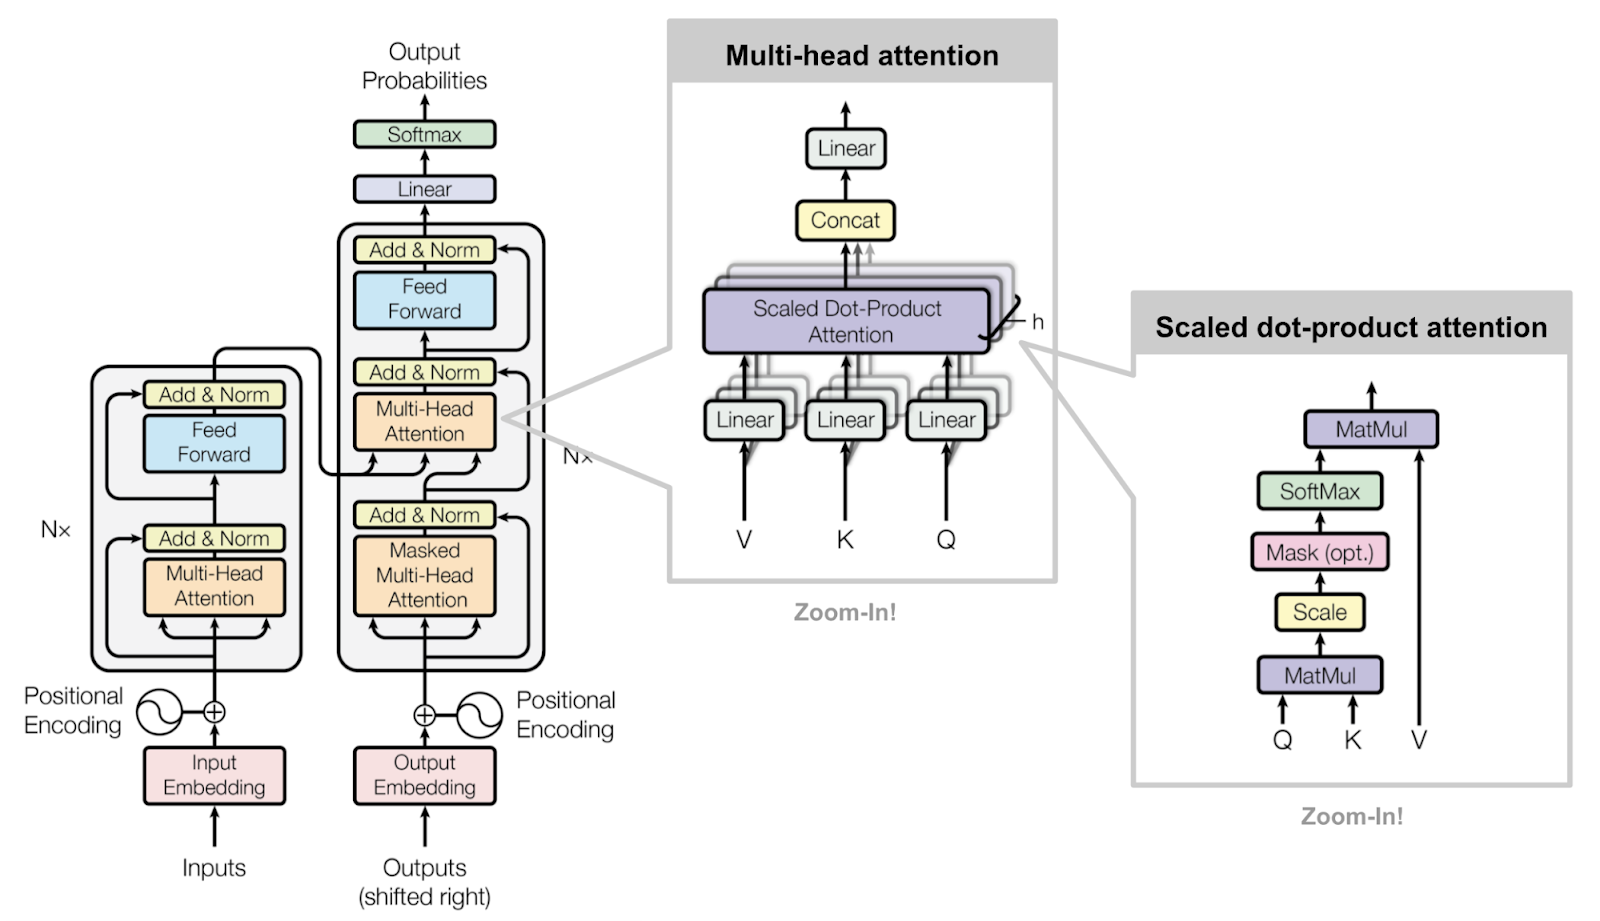

###**Multi Head Attention**
En grundlæggende Transformer består af en Encoder til at læse tekstinputtet og en Decoder til at producere en forudsigelse for opgaven.

Da BERT's mål er at generere en sprogrepræsentationsmodel, behøver den kun encoder-delen. Kodestykket til Multi-head opmærksomhed ser måske kompliceret ud ved første øjekast, men det er kun en maskinoversættelse af ligningen nedenfor:

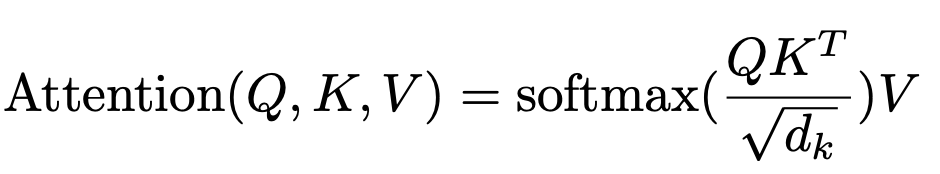

hvor **Q, K, V** er identiske og lineære transformationer af input-indlejringerne. Det der kræver mest opmærksomhed, er formen på inputtensoren, derfor anvendes .permute()-funktionen til at ændre formen på tensoren for at opfylde kravet til dot-produkt.

###**Hvad er inputsensoren og .permute()-funktionen?**

Det er vigtigt at forstå formen på inputtensoren, fordi den har indflydelse på, hvordan Attention-operationen i Transformer-modellen fungerer. Inputtensoren i konteksten af ​​transformer-modellen består normalt af indlejringer af tokens, som repræsenterer ordene i en sætning eller tekst

[Src Link - Transformers From Scratch](https://www.youtube.com/watch?v=acxqoltilME&t=2649s)


**.permute()-funktionen** er en funktion i PyTorch (eller en lignende framework), der tillader omorganisering af dimensionerne i en tensor. Dette er nyttigt, fordi opmærksomhedsoperationen kræver, at dimensionerne i inputtensorerne er arrangeret på en bestemt måde for at udføre dot-produkt mellem **"query" (Q), "key" (K) og "value" (V) tensorer.**

lad os antage, at vi har en inputtensor med dimensioner (**batch_size, seq_length, hidden_size**). For at udføre attention-operationen, skal dimensionerne arrangeres som vist nedenfor:

"query" tensor (Q): (batch_size, num_heads, seq_length, head_dim)

"key" tensor (K): (batch_size, num_heads, head_dim, seq_length)

"value" tensor (V): (batch_size, num_heads, seq_length, head_dim)

**.permute()-funktionen** bruges til at ændre rækkefølgen af dimensionerne, så de matcher kravene til opmærksomhedsoperationen. Dette er vigtigt for at sikre, at dot-produktet mellem "query" og "key" udføres korrekt, og at outputtensorer har de rigtige dimensioner.

Samlet set er det vigtigt at forstå inputtensorens form og bruge .permute()-funktionen korrekt for at sikre, at opmærksomhedsoperationen fungerer korrekt i transformer-modellen.

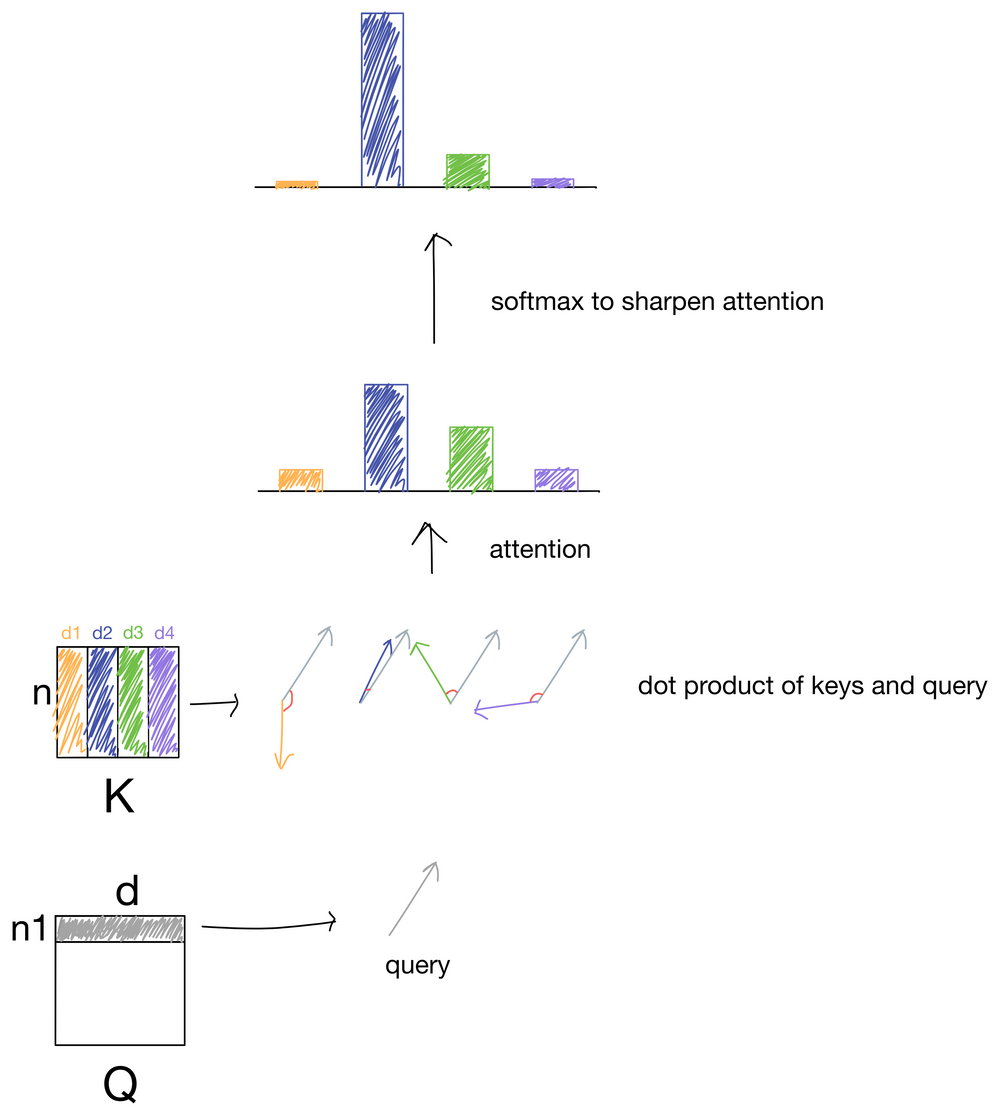

[(Src Link - Multi-head Attention)](https://storrs.io/attention/)

In [ ]:
### attention lag/layers
class MultiHeadedAttention(torch.nn.Module):

    def __init__(self, heads, d_model, dropout=0.1):
        super(MultiHeadedAttention, self).__init__()

        assert d_model % heads == 0
        self.d_k = d_model // heads
        self.heads = heads
        self.dropout = torch.nn.Dropout(dropout)

        self.query = torch.nn.Linear(d_model, d_model)
        self.key = torch.nn.Linear(d_model, d_model)
        self.value = torch.nn.Linear(d_model, d_model)
        self.output_linear = torch.nn.Linear(d_model, d_model)

    def forward(self, query, key, value, mask):
        """
        query, key, value of shape: (batch_size, max_len, d_model)
        mask of shape: (batch_size, 1, 1, max_words)
        """
        # (batch_size, max_len, d_model)
        query = self.query(query)
        key = self.key(key)
        value = self.value(value)

        # (batch_size, max_len, d_model) --> (batch_size, max_len, h, d_k) --> (batch_size, h, max_len, d_k)
        query = query.view(query.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)
        key = key.view(key.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)
        value = value.view(value.shape[0], -1, self.heads, self.d_k).permute(0, 2, 1, 3)

        # (batch_size, h, max_len, d_k) matmul (batch_size, h, d_k, max_len) --> (batch_size, h, max_len, max_len)
        scores = torch.matmul(query, key.permute(0, 1, 3, 2)) / math.sqrt(query.size(-1))

        # fyld 0 mask med et mikro tal, så det ikke påvirker softmax-vægtningen
        # (batch_size, h, max_len, max_len)
        scores = scores.masked_fill(mask == 0, -1e9)

        # (batch_size, h, max_len, max_len)
        # softmax for at sætte "attention weight" for alle non.[PAD]-tokens
        # max_len X max_len matrix of attention
        weights = F.softmax(scores, dim=-1)
        weights = self.dropout(weights)

        # (batch_size, h, max_len, max_len) matmul (batch_size, h, max_len, d_k) --> (batch_size, h, max_len, d_k)
        context = torch.matmul(weights, value)

        # (batch_size, h, max_len, d_k) --> (batch_size, max_len, h, d_k) --> (batch_size, max_len, d_model)
        context = context.permute(0, 2, 1, 3).contiguous().view(context.shape[0], -1, self.heads * self.d_k)

        # (batch_size, max_len, d_model)
        return self.output_linear(context)

class FeedForward(torch.nn.Module):
    "Implements FFN equation."

    def __init__(self, d_model, middle_dim=2048, dropout=0.1):
        super(FeedForward, self).__init__()

        self.fc1 = torch.nn.Linear(d_model, middle_dim)
        self.fc2 = torch.nn.Linear(middle_dim, d_model)
        self.dropout = torch.nn.Dropout(dropout)
        self.activation = torch.nn.GELU()

    def forward(self, x):
        out = self.activation(self.fc1(x))
        out = self.fc2(self.dropout(out))
        return out

class EncoderLayer(torch.nn.Module):
    def __init__(
        self,
        d_model=768,
        heads=12,
        feed_forward_hidden=768 * 4,
        dropout=0.1
        ):
        super(EncoderLayer, self).__init__()
        self.layernorm = torch.nn.LayerNorm(d_model)
        self.self_multihead = MultiHeadedAttention(heads, d_model)
        self.feed_forward = FeedForward(d_model, middle_dim=feed_forward_hidden)
        self.dropout = torch.nn.Dropout(dropout)

    def forward(self, embeddings, mask):
        # embeddings: (batch_size, max_len, d_model)
        # encoder mask: (batch_size, 1, 1, max_len)
        # result: (batch_size, max_len, d_model)
        interacted = self.dropout(self.self_multihead(embeddings, embeddings, embeddings, mask))
        # residual layer
        interacted = self.layernorm(interacted + embeddings)
        # bottleneck
        feed_forward_out = self.dropout(self.feed_forward(interacted))
        encoded = self.layernorm(feed_forward_out + interacted)
        return encoded

###**Multi-Headed Attention**

[Src Video Link - Transformers from scratch](https://youtu.be/acxqoltilME?t=895)

Det kaldes multi-head attention, fordi **hidden_size: d_model(768) er delt af heads(12)**, dette giver modellen mulighed for i fællesskab at behandle informationen på forskellige positioner fra forskellige repræsentationsrum.

Det tager query, key og value som input, og størrelsen permuteres fra **(batch_size, max_len, hidden_size) → (batch_size, num_heads, max_len, hidden_size / num_heads )**. Dette indikerer, at alle de 3 inputs er lineært projiceret fra d_model dimensionelle rum til "heads sets" af d_k dimensionelle vektorer.

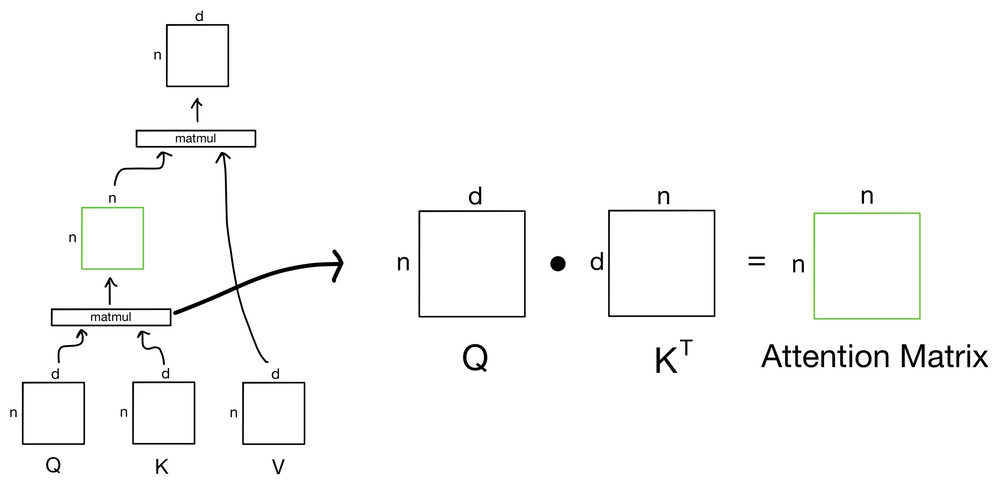


###**Attention-Score-Matrix:**

**attention-score-matrix** beregnes ved hjælp af matrixmultiplikation mellem **query(Q) og key(K)** tensors, efterfulgt af skalering med kvadratroden af nøgletensorens dimension (som vist i figuren ovenfor).

Masken påføres attention-matrixen og fyldes med -1e9 (tæt på negativ uendelighed). Dette gøres, fordi de store negative input til softmax er tæt på nul i outputtet.

**Det endelige output** er en weighted sum af value (V) tensors, hvor disse weights bestemmes af softmax af det skalerede dot-product mellem forespørgslen og nøglevektorerne.

EncoderLayer-klassen indeholder 2 underlag:.

###**Multi-Headed Attention:**
Et MultiHeaded self-Attentions modul, der beregner attention-weight mellem hvert element i inputsekvensen.

###**Self-Attention**
Self-attention tillader modellen at fokusere på forskellige dele af inputsekvensen, mens den udfører opgaver som sprogforståelse eller -generering.

I self-attention-mekanismen beregner modellens attention-weights for hvert ord i inputsekvensen, baseret på dets forhold til alle andre ord i sekvensen. Disse attention-weights bestemmer, hvor meget vægt hvert ord skal give til de andre ord, når den beregner repræsentationen af det pågældende ord. Dermed tillader self-attention, at modellen kan tage hensyn til konteksten omkring hvert ord og fokusere på de mest relevante ord for at forstå meningen i sætningen.

I BERT-modellen bliver self-attention brugt gennem flere lag af transformer-blokke for at opbygge dybe repræsentationer af inputsekvenserne. Dette bidrager til BERTs imponerende evne til at forstå og generere naturligt sprog i en række opgaver, såsom tekstsummering, spørgsmål-svar og maskeret sprogforståelse.

###**FeedForward:**
Et feedforward-netværk med ét skjult lag, der anvender en ikke-lineær aktiveringsfunktion (GELU) på outputtet af det første lineære lag og producerer et d_model dimensionelt output.
Hvert af disse underlag har en resterende forbindelse omkring sig efterfulgt af en lagnormalisering LayerNorm(x + Sublayer(x)). Resterende forbindelser hjælper med at undgå det forsvindende gradientproblem i dybe netværk.

Hvert af disse sublayer har en residual connection omkring sig efterfulgt af en layer normalization:

```
LayerNorm(x + Sublayer(x)). Residual
```

Residual connection hjælper med at undgå et problem kaldet; vanishing gradient problem, som ofte ses i deep networks.

# 7. **Den endelige BERT-model**

Nu vil vi implementerer vores encoder-layers med den nye attention-mekanisme i den endelige konstruktion af vores private BERT-model.

In [ ]:
class BERT(torch.nn.Module):
    """
    BERT model : vores definerede BERT model.
    """

    def __init__(self, vocab_size, d_model=768, n_layers=12, heads=12, dropout=0.1):
        """
        :parameter vocab_size: vocab størrelse vi definerede i starten (30.000)
        :parameter hidden: BERT modellens hidden size
        :parameter n_layers: antal Transformer blocks(layers)
        :parameter attn_heads: antal attention heads
        :parameter dropout: dropout rate
        """

        super().__init__()
        self.d_model = d_model
        self.n_layers = n_layers
        self.heads = heads

        # i det oprindelige BERT Research paper noter de at de brugte 4 * hidden_size for feed_forward_network_hidden_size
        self.feed_forward_hidden = d_model * 4

        # embedding BERT, summen af positional, segment, token embeddings
        self.embedding = BERTEmbedding(vocab_size=vocab_size, embed_size=d_model)

        # multi-lag transformer blokke, deep network
        self.encoder_blocks = torch.nn.ModuleList(
            [EncoderLayer(d_model, heads, d_model * 4, dropout) for _ in range(n_layers)])

    def forward(self, x, segment_info):
        # attention masking for padded token
        # (batch_size, 1, seq_len, seq_len)
        mask = (x > 0).unsqueeze(1).repeat(1, x.size(1), 1).unsqueeze(1)

        # embedding indexeret sequence to sequence af vektorne
        x = self.embedding(x, segment_info)

        # iterere over flere transformer blokke
        for encoder in self.encoder_blocks:
            x = encoder.forward(x, mask)
        return x

class NextSentencePrediction(torch.nn.Module):
    """
   (NSP) 2-klasses klassifikations model : sætningen er enten "is_next", eller "is_not_next"
    """

    def __init__(self, hidden):
        """
        :param hidden: BERT model output størrelse
        """
        super().__init__()
        self.linear = torch.nn.Linear(hidden, 2)
        self.softmax = torch.nn.LogSoftmax(dim=-1)

    def forward(self, x):
        # brug kun det begyndende token [CLS]
        return self.softmax(self.linear(x[:, 0]))

class MaskedLanguageModel(torch.nn.Module):
    """
    forudsig original-tokenet fra den maskerede input sekvense
    n-class klassifikations problem, n-class = vocab_size
    """

    def __init__(self, hidden, vocab_size):
        """
        :param hidden: output størrelse af BERT modellen
        :param vocab_size: total vocab size
        """
        super().__init__()
        self.linear = torch.nn.Linear(hidden, vocab_size)
        self.softmax = torch.nn.LogSoftmax(dim=-1)

    def forward(self, x):
        return self.softmax(self.linear(x))

class BERTLM(torch.nn.Module):
    """
    BERT Sprog Modellen
    Next Sentence Prediction Model + Masked Language Model
    """

    def __init__(self, bert: BERT, vocab_size):
        """
        :param bert: BERT modellen som der skal trænes.
        :param vocab_size: total vocab size for vores masked_lm
        """

        super().__init__()
        self.bert = bert
        self.next_sentence = NextSentencePrediction(self.bert.d_model)
        self.mask_lm = MaskedLanguageModel(self.bert.d_model, vocab_size)

    def forward(self, x, segment_label):
        x = self.bert(x, segment_label)
        return self.next_sentence(x), self.mask_lm(x)


BERT-klassen initialiserer embeddingslaget for inputsekvensen, samt flere lag af EncoderLayer-blokkene. Forward-metoden frr denne klasse tager inputsekvensen og en segment-info-tensor ind, anvender Attention-masking på inputtet (for pad- tokenet), embedder inputsekvensen og sender den derefter gennem encoderblokkene for at opnå output.

**NextSentencePrediction-klassen** er en 2-klasses klassifikationsmodel, der tager output fra BERT-klassen og forudsiger om inputsekvensen, der indeholder 2 sætninger, giver mening  eller nummer 2 sætning ikke giver mening, i forhold til første setning. Forward-metoden anvender lineær transformation og log softmax-funktion for at opnå de forudsagte sandsynligheder for de to klasser.

**MaskedLanguageModel-klassen** er en multi-klasse klassifikationsmodel, der tager output fra BERT-klassen og forudsiger de originale tokens for den maskerede inputsekvens. Frem-metoden anvender en lineær transformation og log softmax-funktion for at opnå de forudsagte sandsynligheder for hvert token i ordforrådet.

**BERTLM-klassen** kombinerer klasserne BERT, NextSentencePrediction og MaskedLanguageModel for at skabe en komplet BERT-sprogmodel.

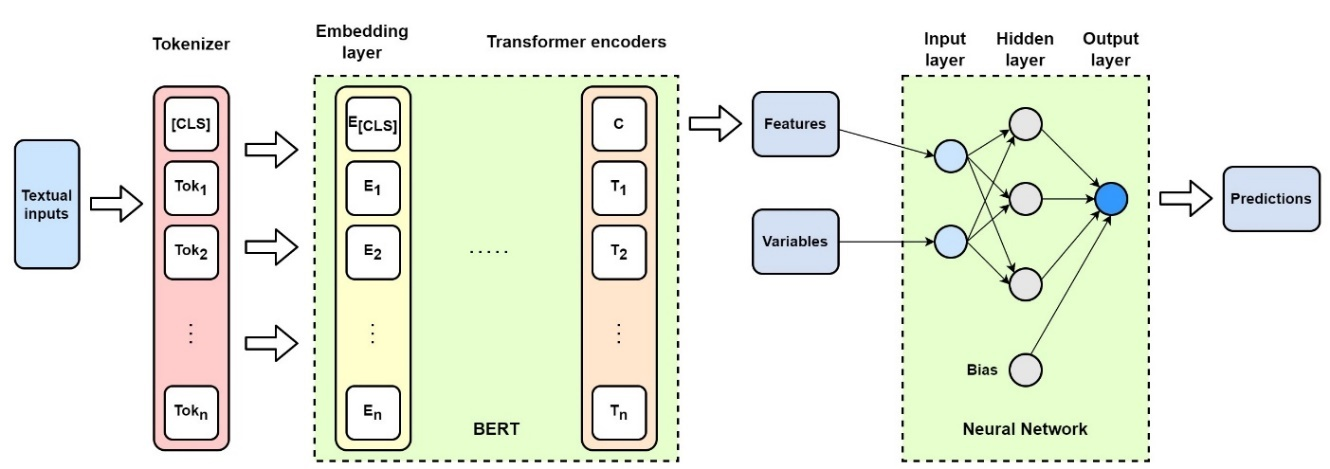

#8. **Optimering med Adam optimizer**
Den originale BERT-model blev trænet ved hjælp af Adam optimizer med en brugerdefineret Learning rate scheduler i henhold til formlen i det oprendelige Research paper.

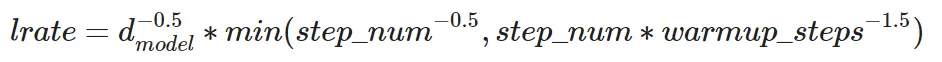

In [ ]:
class ScheduledOptim():
    '''En simpel wrapper-class til learning rate scheduling'''

    def __init__(self, optimizer, d_model, n_warmup_steps):
        self._optimizer = optimizer
        self.n_warmup_steps = n_warmup_steps
        self.n_current_steps = 0
        self.init_lr = np.power(d_model, -0.5)

    def step_and_update_lr(self):
        "Step med indre optimizer"
        self._update_learning_rate()
        self._optimizer.step()

    def zero_grad(self):
        "Zero out gradienterne med den indre optimizer"
        self._optimizer.zero_grad()

    def _get_lr_scale(self):
        return np.min([
            np.power(self.n_current_steps, -0.5),
            np.power(self.n_warmup_steps, -1.5) * self.n_current_steps])

    def _update_learning_rate(self):
        ''' Learning rate scheduling per step '''

        self.n_current_steps += 1
        lr = self.init_lr * self._get_lr_scale()

        for param_group in self._optimizer.param_groups:
            param_group['lr'] = lr
